In [3]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
import random

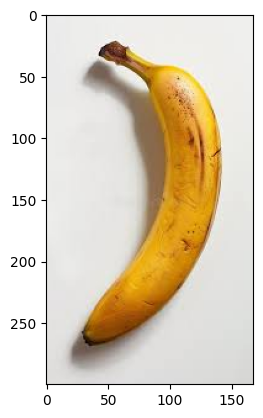

In [4]:
img =  image.load_img('test/b3.jpg')
plt.imshow(img)

In [5]:
cv2.imread('test/b3.jpg').shape


(300, 168, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\train',
                                          target_size = (200,200),
                                          batch_size = 64,
                                          class_mode = 'categorical' )

validation_dataset = validation.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\val',
                                                    target_size = (200, 200),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 864 images belonging to 5 classes.
Found 146 images belonging to 5 classes.


In [8]:
train_dataset.class_indices
validation_dataset.class_indices

{'banana': 0, 'cup': 1, 'pen': 2, 'phone': 3, 'specs': 4}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [11]:
model = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.3463 - loss: 2.8947 - val_accuracy: 0.5685 - val_loss: 1.1884
Epoch 2/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.7447 - loss: 0.8781 - val_accuracy: 0.7877 - val_loss: 0.7813
Epoch 3/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8600 - loss: 0.4856 - val_accuracy: 0.8836 - val_loss: 0.5606
Epoch 4/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9306 - loss: 0.2331 - val_accuracy: 0.8425 - val_loss: 0.5445
Epoch 5/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9599 - loss: 0.1360 - val_accuracy: 0.8493 - val_loss: 0.5351
Epoch 6/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9877 - loss: 0.0536 - val_accuracy: 0.8630 - val_loss: 0.5758
Epoch 7/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9962 - loss: 0.0347 - val_accuracy: 0.8356 - val_loss: 0.5695


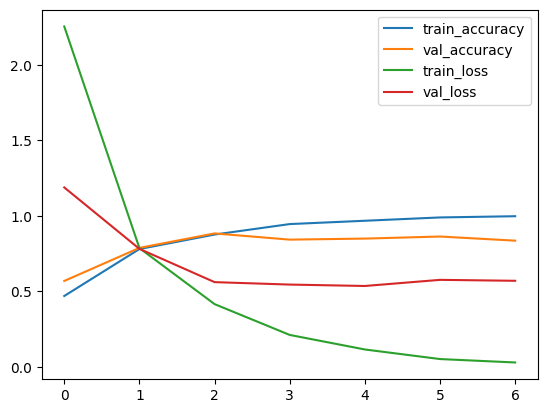

In [13]:
history = model.fit(train_dataset,epochs=7, validation_data=validation_dataset)


# plotting accuracy against loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Loss
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')


In [14]:
model.evaluate(validation_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.8514 - loss: 0.4884


[0.5695056915283203, 0.835616409778595]

In [15]:
class_labels = {v: k for k, v in train_dataset.class_indices.items()}
print(class_labels)

{0: 'banana', 1: 'cup', 2: 'pen', 3: 'phone', 4: 'specs'}


In [1]:
import pyttsx3
test_dir_path = r'C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\test'
images  = os.listdir(test_dir_path)
random_image = random.choice(images)
image_path = os.path.join(test_dir_path, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"You have found your  {class_labels[predicted_class]}!,Congratulations")  # Display the predicted class label

engine = pyttsx3.init()
engine = pyttsx3.init()
# current speech rate

rate = engine.getProperty('rate')

engine.setProperty('rate', rate - 1) 
engine.say(text)
engine.runAndWait()
engine.stop()

print(text)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

NameError: name 'os' is not defined

Uploading an Image 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[9.9997747e-01 8.0554446e-06 7.8669336e-07 1.3571788e-05 6.5757369e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
199
You have found your  banana!,Congratulations


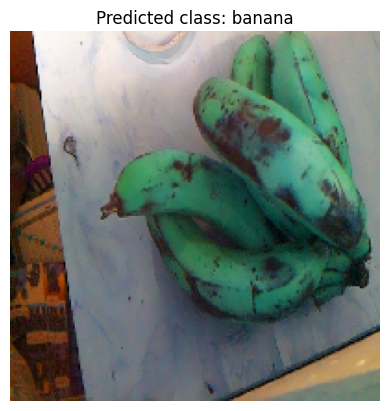

In [17]:
image_path = r'train/banana/bb17.jpg' #load image
img = image.load_img(image_path, target_size=(200, 200)) # resize
img_array = image.img_to_array(img) # convert to an array
img_array = np.expand_dims(img_array, axis = 0)
img_array /=255

prediction = model.predict(img_array)
print(prediction)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"You have found your  {class_labels[predicted_class]}!,Congratulations")  # Display the predicted class label

engine = pyttsx3.init()
engine = pyttsx3.init()
# current speech rate

rate = engine.getProperty('rate')
print(rate)
# engine.setProperty('rate', rate - 10) 
engine.say(text)
engine.runAndWait()
engine.stop()

print(text)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

In [18]:
model.save('model_4.h5') 

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Convert your Keras model
tflite_model = converter.convert()  # Convert to TFLite format

# Save the TFLite model
with open('model_4.tflite', 'wb') as f:
    f.write(tflite_model)  # This writes the TFLite model to your file system

INFO:tensorflow:Assets written to: C:\Users\John\AppData\Local\Temp\tmph853j02q\assets


INFO:tensorflow:Assets written to: C:\Users\John\AppData\Local\Temp\tmph853j02q\assets


Saved artifact at 'C:\Users\John\AppData\Local\Temp\tmph853j02q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2219432345040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219432345232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219484791056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219484792400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219484792208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219484792592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219432344848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2219484793168: TensorSpec(shape=(), dtype=tf.resource, name=None)
